In [1]:
%matplotlib notebook

# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st
from scipy.stats import linregress
import os
import csv


In [2]:
# define variables, lists
# years of data for analysis
year_list = ['2015', '2016', '2017', '2018', '2019', '2022'] # inclusive of all years tested
test_list = ['2015-2019', '2022'] # years for presentation
# project happiness survey categories
categories = ['Happiness Score', 'Family', 'Health', 'Freedom', 'Perceptions of Corruption', 'Generosity']

## assumption - complete happiness is an overall score of 10 with 1/5 or 2 points being the ideal for each category

In [3]:
# Load csv files containing the data from the Happiness Surveys for the years 2015 through 2019 and 2022
clean_data_df = pd.read_csv('Output_data/Happiness_df.csv')

clean_data_df

,Index,Country,Rank (2015),Happiness Score (2015),Family (2015),Health (2015),Freedom (2015),Perceptions of Corruption (2015),Generosity (2015),Rank (2016),...,Freedom (2019),Perceptions of Corruption (2019),Generosity (2019),Rank (2022),Happiness Score (2022),Family (2022),Health (2022),Freedom (2022),Perceptions of Corruption (2022),Generosity (2022)
0,0,Switzerland,1.0,7.587,1.34951,0.94143,0.66557,0.41978,0.29678,2.0,...,0.572,0.343,0.263,4.0,7.512,1.226,0.822,0.677,0.461,0.147
1,1,Iceland,2.0,7.561,1.40223,0.94784,0.62877,0.14145,0.43630,3.0,...,0.591,0.118,0.354,3.0,7.557,1.320,0.803,0.718,0.191,0.270
2,2,Denmark,3.0,7.527,1.36058,0.87464,0.64938,0.48357,0.34139,1.0,...,0.592,0.410,0.252,2.0,7.636,1.243,0.777,0.719,0.532,0.188
3,3,Norway,4.0,7.522,1.33095,0.88521,0.66973,0.36503,0.34699,4.0,...,0.603,0.341,0.271,8.0,7.365,1.239,0.786,0.728,0.474,0.217
4,4,Canada,5.0,7.427,1.32261,0.90563,0.63297,0.32957,0.45811,6.0,...,0.584,0.308,0.285,15.0,7.025,1.188,0.783,0.659,0.368,0.217
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111,132,Ivory Coast,151.0,3.655,0.77115,0.15185,0.46866,0.17922,0.20165,139.0,...,0.352,0.090,0.154,88.0,5.235,0.442,0.322,0.451,0.124,0.149
112,133,Burkina Faso,152.0,3.587,0.85188,0.27125,0.39493,0.12832,0.21747,145.0,...,0.255,0.113,0.177,113.0,4.670,0.565,0.320,0.382,0.126,0.186
113,134,Afghanistan,153.0,3.575,0.30285,0.30335,0.23414,0.09719,0.36510,154.0,...,0.000,0.025,0.158,146.0,2.404,0.000,0.289,0.000,0.005,0.089
114,136,Benin,155.0,3.340,0.35386,0.31910,0.48450,0.08010,0.18260,153.0,...,0.349,0.082,0.175,115.0,4.623,0.064,0.335,0.479,0.230,0.127


In [4]:
# confirm lack of NaN values
clean_data_df.isnull().values.any()

False

In [5]:
# add a column for the average health scores for 2015 through 2019
clean_data_df['Health (2015-2019)']=((clean_data_df['Health (2015)'] +
                                      clean_data_df['Health (2016)'] +
                                      clean_data_df['Health (2017)'] +
                                      clean_data_df['Health (2018)'] +
                                      clean_data_df['Health (2019)']
                                          ) / 5)
clean_data_df

,Index,Country,Rank (2015),Happiness Score (2015),Family (2015),Health (2015),Freedom (2015),Perceptions of Corruption (2015),Generosity (2015),Rank (2016),...,Perceptions of Corruption (2019),Generosity (2019),Rank (2022),Happiness Score (2022),Family (2022),Health (2022),Freedom (2022),Perceptions of Corruption (2022),Generosity (2022),Health (2015-2019)
0,0,Switzerland,1.0,7.587,1.34951,0.94143,0.66557,0.41978,0.29678,2.0,...,0.343,0.263,4.0,7.512,1.226,0.822,0.677,0.461,0.147,0.928318
1,1,Iceland,2.0,7.561,1.40223,0.94784,0.62877,0.14145,0.43630,3.0,...,0.118,0.354,3.0,7.557,1.320,0.803,0.718,0.191,0.270,0.917744
2,2,Denmark,3.0,7.527,1.36058,0.87464,0.64938,0.48357,0.34139,1.0,...,0.410,0.252,2.0,7.636,1.243,0.777,0.719,0.532,0.188,0.865249
3,3,Norway,4.0,7.522,1.33095,0.88521,0.66973,0.36503,0.34699,4.0,...,0.341,0.271,8.0,7.365,1.239,0.786,0.728,0.474,0.217,0.873333
4,4,Canada,5.0,7.427,1.32261,0.90563,0.63297,0.32957,0.45811,6.0,...,0.308,0.285,15.0,7.025,1.188,0.783,0.659,0.368,0.217,0.900558
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111,132,Ivory Coast,151.0,3.655,0.77115,0.15185,0.46866,0.17922,0.20165,139.0,...,0.090,0.154,88.0,5.235,0.442,0.322,0.451,0.124,0.149,0.111450
112,133,Burkina Faso,152.0,3.587,0.85188,0.27125,0.39493,0.12832,0.21747,145.0,...,0.113,0.177,113.0,4.670,0.565,0.320,0.382,0.126,0.186,0.266813
113,134,Afghanistan,153.0,3.575,0.30285,0.30335,0.23414,0.09719,0.36510,154.0,...,0.025,0.158,146.0,2.404,0.000,0.289,0.000,0.005,0.089,0.254707
114,136,Benin,155.0,3.340,0.35386,0.31910,0.48450,0.08010,0.18260,153.0,...,0.082,0.175,115.0,4.623,0.064,0.335,0.479,0.230,0.127,0.275262


In [6]:
# add a column for the average health scores for 2015 through 2019
clean_data_df['Health (2015-2019)']=((clean_data_df['Health (2015)'] +
                                      clean_data_df['Health (2016)'] +
                                      clean_data_df['Health (2017)'] +
                                      clean_data_df['Health (2018)'] +
                                      clean_data_df['Health (2019)']
                                          ) / 5)
clean_data_df

,Index,Country,Rank (2015),Happiness Score (2015),Family (2015),Health (2015),Freedom (2015),Perceptions of Corruption (2015),Generosity (2015),Rank (2016),...,Generosity (2019),Rank (2022),Happiness Score (2022),Family (2022),Health (2022),Freedom (2022),Perceptions of Corruption (2022),Generosity (2022),Health (2015-2019),Happiness Score (2015-2019)
0,0,Switzerland,1.0,7.587,1.34951,0.94143,0.66557,0.41978,0.29678,2.0,...,0.263,4.0,7.512,1.226,0.822,0.677,0.461,0.147,0.928318,7.5114
1,1,Iceland,2.0,7.561,1.40223,0.94784,0.62877,0.14145,0.43630,3.0,...,0.354,3.0,7.557,1.320,0.803,0.718,0.191,0.270,0.917744,7.5110
2,2,Denmark,3.0,7.527,1.36058,0.87464,0.64938,0.48357,0.34139,1.0,...,0.252,2.0,7.636,1.243,0.777,0.719,0.532,0.188,0.865249,7.5460
3,3,Norway,4.0,7.522,1.33095,0.88521,0.66973,0.36503,0.34699,4.0,...,0.271,8.0,7.365,1.239,0.786,0.728,0.474,0.217,0.873333,7.5410
4,4,Canada,5.0,7.427,1.32261,0.90563,0.63297,0.32957,0.45811,6.0,...,0.285,15.0,7.025,1.188,0.783,0.659,0.368,0.217,0.900558,7.3506
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111,132,Ivory Coast,151.0,3.655,0.77115,0.15185,0.46866,0.17922,0.20165,139.0,...,0.154,88.0,5.235,0.442,0.322,0.451,0.124,0.149,0.111450,4.2732
112,133,Burkina Faso,152.0,3.587,0.85188,0.27125,0.39493,0.12832,0.21747,145.0,...,0.177,113.0,4.670,0.565,0.320,0.382,0.126,0.186,0.266813,4.0738
113,134,Afghanistan,153.0,3.575,0.30285,0.30335,0.23414,0.09719,0.36510,154.0,...,0.158,146.0,2.404,0.000,0.289,0.000,0.005,0.089,0.254707,3.5128
114,136,Benin,155.0,3.340,0.35386,0.31910,0.48450,0.08010,0.18260,153.0,...,0.175,115.0,4.623,0.064,0.335,0.479,0.230,0.127,0.275262,3.9010


<IPython.core.display.Javascript object>


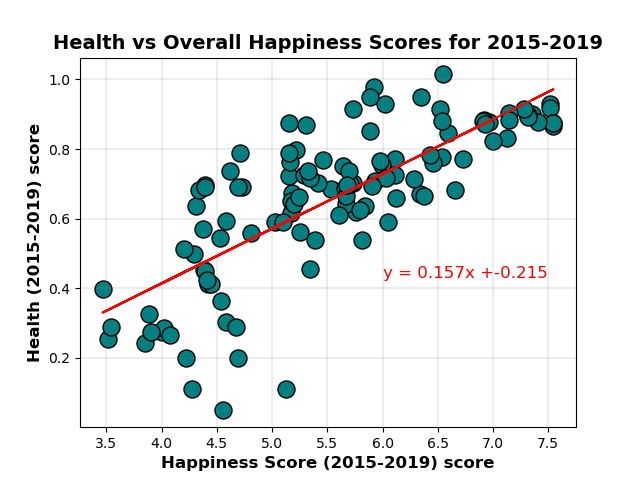

For the Happiness Survey Year(s) 2015-2019
The r-value is: 0.587 and the pvalue is: 0.0
The slope intercept is: y = 0.157x +-0.215


<IPython.core.display.Javascript object>


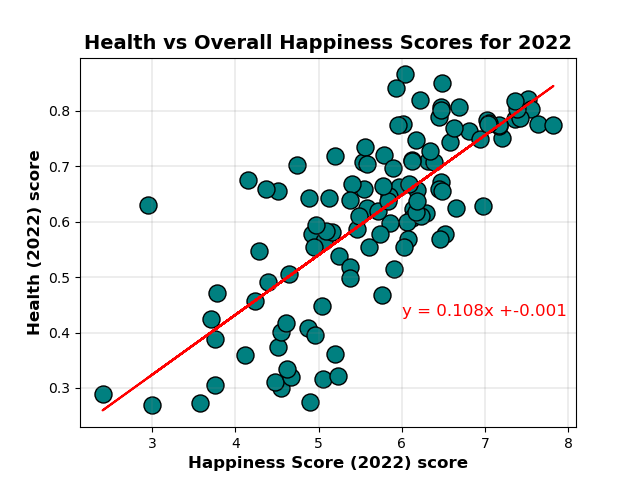

For the Happiness Survey Year(s) 2022
The r-value is: 0.564 and the pvalue is: 0.0
The slope intercept is: y = 0.108x +-0.001


In [8]:
# create scatter plot for Health Score vs Overall Happiness Score
# sort by the category value and create DataFrame for plotting for 2015
    # define loop variables
loop_category = categories[2] # Health Happiness Score
top_category = categories[0]  # Overall Happiness Score, list index of zero  

i = 0
for year in test_list:
    ## for the year testing
    test_year = test_list[i]
        ## create the column for testing
    col = f'{loop_category} ({test_year})'
        ## create the column for testing
    top_col = f'{top_category} ({test_year})' 
  #  clean_data_df_sorted = clean_data_df.sort_values(f'{top_col}', ascending=False)    

    # for Overall Happiness Score (x-values) and Category Scores (y_values) for the Years selected
        ## values for plotting
    x_values = clean_data_df[f'{top_col}']
    y_values = clean_data_df[f'{col}']

    # statistics
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values =x_values * slope + intercept

    # set up the y=mx+b detail to overlay the scatter plot
    slope_intercept = 'y = ' + str(round(slope,3)) + 'x +' + str(round(intercept,3))  ## y = mx + b

    # plot details, add annotation, add chart features
    plt.figure()
    plt.scatter(x_values, y_values, s=150, marker='o', edgecolors='black', c='teal')
    plt.plot(x_values, regress_values, 'r-') ##'r-' is a red line

    plt.annotate(slope_intercept, (6,.43), fontsize=12, color="red")

    # set title, labels, grid, then save and present the data
    plt.title(f'{loop_category} vs Overall Happiness Scores for {test_year}', fontsize=14, weight='bold')           
    plt.xlabel(f'{top_col} score', fontsize=12, weight='bold')
    plt.ylabel(f'{col} score', fontsize=12, weight='bold')
    plt.grid(color='gray', linestyle='-', linewidth=0.2)


    # print r value and pvalue
    print(f'For the Happiness Survey Year(s) {test_year}')
    print(f'The r-value is: {round(rvalue**2,3)} and the pvalue is: {round(pvalue**2,3)}')
    print(f'The slope intercept is: {slope_intercept}')

    # Save the figure
    #plt.savefig("output_data/Fig5.png")
    i += 1
    # present the data
plt.show()

In [ ]:
# Select Health data
health_data_df = pd.DataFrame(clean_data_df[['Country',
                                            'Health (2015)',
                                            'Health (2016)',
                                            'Health (2017)',
                                            'Health (2018)',
                                            'Health (2019)'
                                            #'Health (2022)'
                                            ]])
#country_data_df = country_data_df.rename(columns={'Country.1':'Country'})
health_data_df

In [ ]:
# Select country and corresponsing Health columns for the years
happy_data_df = pd.DataFrame(clean_data_df[['Country',
                                            'Happiness Score (2015)',
                                            'Happiness Score (2016)',
                                            'Happiness Score (2017)',
                                            'Happiness Score (2018)',
                                            'Happiness Score (2019)'
                                            #'Happiness Score (2022)',
                                             ]])

# display only the columns pertaining to health
happy_data_df

In [ ]:
# combine health score columns average for pre-covid years 2015 through 2019
health_data_df['Health 2015-2019']=((health_data_df['Health (2015)'] +
                                           health_data_df['Health (2016)'] +
                                           health_data_df['Health (2017)'] +
                                           health_data_df['Health (2018)'] +
                                           health_data_df['Health (2019)']
                                          ) / 5)
health_data_df

In [ ]:
#for category in categories:
#    c += 1  # which category the information draws, skip the first overall category
    
loop_category = categories[2] # Health Happiness Score
top_category = categories[0]  # Overall Happiness Score, list index of zero
    # restart categories for the next year
i = 0
for test in test_list:
        # define loop variables
            ## for the year testing
    test_year = test_list[i]
        ## create the column for testing
    col = f'{loop_category} ({test_year})'
        ## create the column for testing
    top_col = f'{top_category} ({test_year})'

    # sort by the category value and create DataFrame for plotting
    clean_data_df_sorted = clean_data_df.sort_values(f'{top_col}', ascending=False)    

    ## for Overall Happiness Score (x-values) and Category Scores (y_values) for the Years selected
        ## values for plotting
    x_values = clean_data_df_sorted[f'{top_col}']
    y_values = clean_data_df_sorted[f'{col}']

    # statistics
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values =x_values * slope + intercept

    # set up the y=mx+b detail to overlay the scatter plot
    slope_intercept = 'y = ' + str(round(slope,3)) + 'x +' + str(round(intercept,3))  ## y = mx + b

    # plot details, add annotation, add chart features
    plt.figure()
    plt.scatter(x_values, y_values, s=150, marker='o', edgecolors='Black', c='Teal')
    plt.plot(x_values, regress_values, 'r-') ##'r-' is a red line

    plt.annotate(slope_intercept, (10,10), fontsize=20, color="red")

    # set title, labels, grid, then save and present the data
    plt.title(f'Health vs Overall Happiness Scores for {test_year}', fontsize=18, weight='bold')           
    plt.xlabel(f'{top_col} score', fontsize=14, weight='bold')
    plt.ylabel(f'{col} score', fontsize=14, weight='bold')
    plt.grid(color='gray', linestyle='-', linewidth=0.2)

    # print r value and pvalue
    print(f'For the Happiness Survey Year {test_year}')
    print(f'The r-value is: {round(rvalue**2,3)} and the pvalue is: {round(pvalue**2,3)}')
    print(f'The slope intercept is: {slope_intercept}')

    # Save the figure
    #plt.savefig("output_data/Fig5.png")

    # present the data
    plt.show()
        # and create chart for the next year
    i += 1
# next criteria to create charts if desired
#c +=1

In [ ]:
agg = health_data_df.groupby.agg(['mean','median','var','std','sem'])
agg

In [ ]:
agg = happy_data_df.agg(['mean','median','var','std','sem'])
agg

In [ ]:
#dfg = df.groupby(['name']).size().to_frame().sort_values([0], ascending = False).head(5).reset_index()

In [ ]:
# Top/Bottom Health Score by Country 2016
loop_category = categories[2] # Health Happiness Score
i = 1 # 2016 year in year_list

test_year = year_list[i]
    ## create the column for testing
col = f'{loop_category} ({test_year})'

# sort by the category value and create DataFrame for plotting
health_df_sorted = health_data_df.sort_values(f'{col}', ascending=False)    
health_df_sorted.head(10), f'{test_year} HAPPY ↑',' -' * 30, f'{test_year} SAD ↓', health_df_sorted.tail(10)

In [ ]:
# Top/Bottom Health Score by Country 2017
loop_category = categories[2] # Health Happiness Score
i = 2 # 2017 year in year_list

test_year = year_list[i]
    ## create the column for testing
col = f'{loop_category} ({test_year})'

# sort by the category value and create DataFrame for plotting
health_df_sorted = health_data_df.sort_values(f'{col}', ascending=False)    
health_df_sorted.head(10), f'{test_year} HAPPY ↑',' -' * 30, f'{test_year} SAD ↓', health_df_sorted.tail(10)

In [ ]:
# Top/Bottom Health Score by Country 2018
loop_category = categories[2] # Health Happiness Score
i = 3 # 2018 year in year_list

test_year = year_list[i]
    ## create the column for testing
col = f'{loop_category} ({test_year})'

# sort by the category value and create DataFrame for plotting
health_df_sorted = health_data_df.sort_values(f'{col}', ascending=False)    
health_df_sorted.head(10), f'{test_year} HAPPY ↑',' -' * 30, f'{test_year} SAD ↓', health_df_sorted.tail(10)

In [ ]:
# Top/Bottom Health Score by Country 2019
loop_category = categories[2] # Health Happiness Score
i = 4 # 2019 year in year_list

test_year = year_list[i]
    ## create the column for testing
col = f'{loop_category} ({test_year})'

# sort by the category value and create DataFrame for plotting
health_df_sorted = health_data_df.sort_values(f'{col}', ascending=False)    
health_df_sorted.head(10), f'{test_year} HAPPY ↑',' -' * 30, f'{test_year} SAD ↓', health_df_sorted.tail(10)

In [ ]:
# Top/Bottom Health Score by Country 2022
loop_category = categories[2] # Health Happiness Score
i = 5 # 2022 year in year_list

test_year = year_list[i]
    ## create the column for testing
col = f'{loop_category} ({test_year})'

# sort by the category value and create DataFrame for plotting
health_df_sorted = health_data_df.sort_values(f'{col}', ascending=False)    
health_df_sorted.head(10), f'{test_year} HAPPY ↑',' -' * 30, f'{test_year} SAD ↓', health_df_sorted.tail(10)

In [ ]:
# Top/Bottom OVERALL Happiness Score by Country 2015
loop_category = categories[0] # Health Happiness Score
i = 0 # 2015 year in year_list

test_year = year_list[i]
    ## create the column for testing
col = f'{loop_category} ({test_year})'

# sort by the category value and create DataFrame for plotting
happy_df_sorted = happy_data_df.sort_values(f'{col}', ascending=False)    
happy_df_sorted.head(10), f'{test_year} Overall HAPPY ↑',' -' * 30, f'{test_year} Overall SAD ↓', health_df_sorted.tail(10)

In [ ]:
# Top/Bottom OVERALL Happiness Score by Country 2016
loop_category = categories[0] # Health Happiness Score
i = 1 # 2016 year in year_list

test_year = year_list[i]
    ## create the column for testing
col = f'{loop_category} ({test_year})'

# sort by the category value and create DataFrame for plotting
happy_df_sorted = happy_data_df.sort_values(f'{col}', ascending=False)    
happy_df_sorted.head(10), f'{test_year} Overall HAPPY ↑',' -' * 30, f'{test_year} Overall SAD ↓', health_df_sorted.tail(10)

In [ ]:
# Top/Bottom OVERALL Happiness Score by Country 2017
loop_category = categories[0] # Health Happiness Score
i = 2 # 2017 year in year_list

test_year = year_list[i]
    ## create the column for testing
col = f'{loop_category} ({test_year})'

# sort by the category value and create DataFrame for plotting
happy_df_sorted = happy_data_df.sort_values(f'{col}', ascending=False)    
happy_df_sorted.head(10), f'{test_year} Overall HAPPY ↑',' -' * 30, f'{test_year} Overall SAD ↓', health_df_sorted.tail(10)

In [ ]:
# Top/Bottom OVERALL Happiness Score by Country 2018
loop_category = categories[0] # Health Happiness Score
i = 3 # 2018 year in year_list

test_year = year_list[i]
    ## create the column for testing
col = f'{loop_category} ({test_year})'

# sort by the category value and create DataFrame for plotting
happy_df_sorted = happy_data_df.sort_values(f'{col}', ascending=False)    
happy_df_sorted.head(10), f'{test_year} Overall HAPPY ↑',' -' * 30, f'{test_year} Overall SAD ↓', health_df_sorted.tail(10)

In [ ]:
# Top/Bottom OVERALL Happiness Score by Country 2019
loop_category = categories[0] # Health Happiness Score
i = 4 # 2019 year in year_list

test_year = year_list[i]
    ## create the column for testing
col = f'{loop_category} ({test_year})'

# sort by the category value and create DataFrame for plotting
happy_df_sorted = happy_data_df.sort_values(f'{col}', ascending=False)    
happy_df_sorted.head(10), f'{test_year} Overall HAPPY ↑',' -' * 30, f'{test_year} Overall SAD ↓', health_df_sorted.tail(10)

In [ ]:
# Top/Bottom OVERALL Happiness Score by Country 2022
loop_category = categories[0] # Health Happiness Score
i = 5 # 2022 year in year_list

test_year = year_list[i]
    ## create the column for testing
col = f'{loop_category} ({test_year})'

# sort by the category value and create DataFrame for plotting
happy_df_sorted = happy_data_df.sort_values(f'{col}', ascending=False)    
happy_df_sorted.head(10), f'{test_year} Overall HAPPY ↑',' -' * 30, f'{test_year} Overall SAD ↓', health_df_sorted.tail(10)

In [ ]:
# loop through new DataFrames to make a bar graph of Health Happiness Scores
loop_category = categories[2]

###c = 0  # which criteria the information draws
i = 0  # location criteria test number for y values

# loop for all criteria if desired
###for category in categories:
    # restart criteria for the next year
###i = 0
for yr in year_list:

    # define loop variables
        ## for the year testing
    test_year = year_list[i]
        ## create the column for testing
    col = f'{loop_category} ({test_year})'
        ## create the DataFrame for testing
    score_df = f'{loop_category}{test_year}_df'

    # sort by the category value and create DataFrame for plotting
    health_data_df_sorted = health_data_df.sort_values(f'{col}', ascending=False)    
    score_df = pd.DataFrame(health_data_df_sorted, columns = ['Country',f'{col}'])

    # create bar chart without the x axis tick marks
    score_df.plot(kind='bar',
                         color='teal',
                         legend=None,
                         title= (f'{loop_category} Happiness Scores for {test_year}')
                         )
    # simply analyzing the shape of the graph, don't need country name just yet
    plt.tick_params(axis='x', labelsize=0, length = 0)

    #plt.savefig("Images/Figure1.png")
   # plt.show()

    # and create chart for the next year
    i += 1

# next criteria to create charts if desired
###c +=1

In [ ]:

# top_category = categories[0]
# test_year = year_list[1]
# top_col = f'{top_category} ({test_year})'
# # top_category
# happy_data_df_sorted = happy_data_df.sort_values(f'{top_col}', ascending=False)
# score_overall_df = pd.DataFrame(happy_data_df_sorted, columns = ['Country','Happiness Score (2016)'])
# #score_overall_df = pd.DataFrame(health_data_df_sorted, columns = ['Country',f'{top_col}'])
# score_overall_df

In [ ]:
###TEST TEST TEST

loop_category = categories[2] # Health Happiness Score
top_category = categories[0]  # Overall Happiness Score

test_year = year_list[2]
    ## create the column for testing
col = f'{loop_category} ({test_year})'
    ## create the column for testing
top_col = f'{top_category} ({test_year})'    
    ## create the DataFrame for testing
# score_df = f'{loop_category}{test_year}_df'

# sort by the category value and create DataFrame for plotting
clean_data_df_sorted = clean_data_df.sort_values(f'{top_col}', ascending=False)    

# for Overall Happiness Score (x-values) and Category Scores (y_values) for the Years selected
# values for plotting
x_values = clean_data_df_sorted[f'{top_col}']
y_values = clean_data_df_sorted[f'{col}']

# statistics
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values =x_values * slope + intercept

# set up the y=mx+b detail to overlay the scatter plot
slope_intercept = 'y = ' + str(round(slope,2)) + 'x +' + str(round(intercept,2))  ## y = mx + b

slope_intercept, regress_values, slope, pvalue

In [ ]:
# loop through new DataFrames to make a scatter plot of Health Happiness Scores

i = 0  # location criteria test number for y values

# loop for all categories if desired
for category in categories:
    c += 1  # which category the information draws, skip the first overall category
    
    loop_category = categories[2] # Health Happiness Score
    top_category = categories[0]  # Overall Happiness Score, list index of zero
    # restart categories for the next year
    for yr in year_list:
        # define loop variables
            ## for the year testing
        test_year = year_list[i]
            ## create the column for testing
        col = f'{loop_category} ({test_year})'
            ## create the column for testing
        top_col = f'{top_category} ({test_year})'

        # sort by the category value and create DataFrame for plotting
        clean_data_df_sorted = clean_data_df.sort_values(f'{top_col}', ascending=False)    

        ## for Overall Happiness Score (x-values) and Category Scores (y_values) for the Years selected
            ## values for plotting
        x_values = clean_data_df_sorted[f'{top_col}']
        y_values = clean_data_df_sorted[f'{col}']

        # statistics
        (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
        regress_values =x_values * slope + intercept

        # set up the y=mx+b detail to overlay the scatter plot
        slope_intercept = 'y = ' + str(round(slope,3)) + 'x +' + str(round(intercept,3))  ## y = mx + b

        # plot details, add annotation, add chart features
        plt.figure()
        plt.scatter(x_values, y_values, s=150, marker='o', edgecolors='Black', c='Teal')
        plt.plot(x_values, regress_values, 'r-') ##'r-' is a red line

        plt.annotate(slope_intercept, (10,10), fontsize=20, color="red")

        # set title, labels, grid, then save and present the data
        plt.title(f'Health vs Overall Happiness Scores for {test_year}', fontsize=18, weight='bold')           
        plt.xlabel(f'{top_col} score', fontsize=14, weight='bold')
        plt.ylabel(f'{col} score', fontsize=14, weight='bold')
        plt.grid(color='gray', linestyle='-', linewidth=0.2)

        # print r value and pvalue
        print(f'For the Happiness Survey Year {test_year}')
        print(f'The r-value is: {round(rvalue**2,3)} and the pvalue is: {round(pvalue**2,3)}')
        print(f'The slope intercept is: {slope_intercept}')

        # Save the figure
        #plt.savefig("output_data/Fig5.png")

        # present the data
        plt.show()
        # and create chart for the next year
        i += 1
# next criteria to create charts if desired
#c +=1

In [ ]:
# THIS IS REAL NOT TEST
# define loop variables
        ## for the year testing
i = 0    
for yr in year_list:    
    
    #define variables
    test_year = year_list[i]
    ## create the column for testing
    col = f'{loop_category} ({test_year})'
    ## create the column for testing
    top_col = f'{top_category} ({test_year})' 
        
    # sort by the category value and create DataFrame for plotting
    clean_data_df_sorted = clean_data_df.sort_values(f'{top_col}', ascending=False)    
        
    # for Overall Happiness Score (x-values) and Category Scores (y_values) for the Years selected
        ## values for plotting
    x_values = clean_data_df_sorted[f'{top_col}']
    y_values = clean_data_df_sorted[f'{col}']
    
    # statistics
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values =x_values * slope + intercept
    
    # set up the y=mx+b detail to overlay the scatter plot
    slope_intercept = 'y = ' + str(round(slope,3)) + 'x +' + str(round(intercept,3))  ## y = mx + b

    # plot details, add annotation, add chart features
    plt.figure()
    plt.scatter(x_values, y_values, s=150, marker='o', edgecolors='Black', c='Teal')
    plt.plot(x_values, regress_values, 'r-') ##'r-' is a red line
    
    plt.annotate(slope_intercept, (10,10), fontsize=20, color="red")
    
    # set title, labels, grid, then save and present the data
    plt.title(f'Health vs Overall Happiness Scores for {test_year}', fontsize=18, weight='bold')           
    plt.xlabel(f'{top_col} score', fontsize=14, weight='bold')
    plt.ylabel(f'{col} score', fontsize=14, weight='bold')
    plt.grid(color='gray', linestyle='-', linewidth=0.2)

    # print r value and pvalue
    print(f'For the Happiness Survey Year {test_year}')
    print(f'The r-value is: {round(rvalue**2,3)} and the pvalue is: {round(pvalue**2,3)}')
    print(f'The slope intercept is: {slope_intercept}')
          
    # Save the figure
    #plt.savefig("output_data/Fig5.png")
    i += 1
    # present the data
    plt.show()
    # and create chart for the next year
i += 1


In [ ]:
 # Select country and corresponsing Happiness Scores columns for the years
happy_data_df = pd.DataFrame(clean_data_df[['Country',
                                            'Happiness Score (2015)',
                                            'Happiness Score (2016)',
                                            'Happiness Score (2017)',
                                            'Happiness Score (2018)',
                                            'Happiness Score (2019)',
                                            'Happiness Score (2022)'
                                            ]])

# display only the columns pertaining to overall happiness
happy_data_df

In [ ]:
# top 5 happy countries

i = 0
for yr in year_list:    
    
    #define variables
    test_year = year_list[i]
    ## create the column for testing
    col = f'{loop_category} ({test_year})'
    ## create the column for testing
    top_col = f'{top_category} ({test_year})' 
        
    # sort by the category value and create DataFrame for plotting
    happy_data_df_sorted = happy_data_df.sort_values(f'{top_col}', ascending=False)
    

In [ ]:
# create DataFrame with columns for aggregate purposes (country, year, score)
agg_df = clean_data_df.groupby(['Country']).agg(['mean','median','var','std','sem'])
agg_df.dtypes

In [ ]:
# sort by the category value and create DataFrame for plotting for 2015
    # define loop variables
    ## for the year testing
test_year = year_list[0]
    ## create the column for testing
col = f'{loop_category} ({test_year})'
    ## create the column for testing
top_col = f'{top_category} ({test_year})' 
clean_data_df_sorted = clean_data_df.sort_values(f'{top_col}', ascending=False)    

# for Overall Happiness Score (x-values) and Category Scores (y_values) for the Years selected
    ## values for plotting
x_values = clean_data_df_sorted[f'{top_col}']
y_values = clean_data_df_sorted[f'{col}']

# statistics
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values =x_values * slope + intercept

# set up the y=mx+b detail to overlay the scatter plot
slope_intercept = 'y = ' + str(round(slope,3)) + 'x +' + str(round(intercept,3))  ## y = mx + b

# plot details, add annotation, add chart features
plt.figure()
plt.scatter(x_values, y_values, s=150, marker='o', edgecolors='Black', c='Teal')
plt.plot(x_values, regress_values, 'r-') ##'r-' is a red line

plt.annotate(slope_intercept, (10,10), fontsize=20, color="red")

# set title, labels, grid, then save and present the data
plt.title(f'Health vs Overall Happiness Scores for {test_year}', fontsize=18, weight='bold')           
plt.xlabel(f'{top_col} score', fontsize=14, weight='bold')
plt.ylabel(f'{col} score', fontsize=14, weight='bold')
plt.grid(color='gray', linestyle='-', linewidth=0.2)


# print r value and pvalue
print(f'For the Happiness Survey Year {test_year}')
print(f'The r-value is: {round(rvalue**2,3)} and the pvalue is: {round(pvalue**2,3)}')
# print(f'The slope intercept is: {slope_intercept}')

# Save the figure
#plt.savefig("output_data/Fig5.png")

# present the data
plt.show()

In [ ]:

health_data_df_sorted = health_data_df.sort_values(f'{col}', ascending=False)    
score_df = pd.DataFrame(health_data_df_sorted, columns = ['Country',f'{col}'])

In [ ]:
agg = mouse_study_clean.groupby(['Drug Regimen'])['Tumor Volume (mm3)'].agg(['mean','median','var','std','sem'])
agg